In [3]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import warnings
warnings.filterwarnings("ignore")

# Basic
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import os
import random
from tqdm.autonotebook import tqdm
import string
from collections import Counter
import re

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px

%matplotlib inline
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 100) 

In [2]:
df = pd.read_excel("Case Prediction Data2.xlsx")

In [4]:
df

Case Number                                            Subject  \
0            204977                                   Efile Acceptance   
1            204979  Oregon STAT help: Previous Case 203787 Client ...   
2            204980             Data map incorrectly pulling in values   
3            204981  The New Corptax Connect Website is not properl...   
4            204986     LD400 is not reflecting a temporary adjustment   
...             ...                                                ...   
189183       518074  Possible Wrong Calculation for LA Plaquemines ...   
189184       518075  Sch. L and M-2 not populating in Short Period ...   
189185       518076                 Legacy Form 8992 GILTI Calculation   
189186       518077                VA Efile Diagnostics - not due 8/15   
189187       518078                          Request Login Credentials   

              Date Created         Date Closed  Origin Priority  \
0      2017-01-02 05:39:00 2017-01-03 09:03:00     Web   Medium   
1      2017-01-02 09:03:00 2017-01-04 16:56:00     Web     High   
2      2017-01-02 11:25:00 2017-01-03 15:48:00     Web   Medium   
3      2017-01-02 12:06:00 2017-01-03 09:26:00     Web     High   
4      2017-01-03 07:17:00 2017-01-05 08:21:00  E-mail   Medium   
...                    ...                 ...     ...      ...   
189183 2022-08-15 20:04:00 2022-08-16 16:27:00  E-mail   Medium   
189184 2022-08-15 20:05:00 2022-08-16 17:37:00     Web   Medium   
189185 2022-08-15 20:22:00 2022-08-16 13:57:00     Web     High   
189186 2022-08-15 20:45:00 2022-08-17 17:32:00     Web   Medium   
189187 2022-08-15 22:37:00 2022-08-16 03:44:00     Web      Low   

                   Team          Case Type       SLA  \
0       Tax Preparation              Efile  Platinum   
1       Tax Preparation  Question / How To    Silver   
2       Tax Preparation  Question / How To    Silver   
3       Tax Preparation    Problem / Error    Silver   
4       Tax Preparation    Problem / Error  Platinum   
...                 ...                ...       ...   
189183  Tax Preparation    Problem / Error    Silver   
189184  Tax Preparation  Question / How To  Platinum   
189185  Tax Preparation  Question / How To    Silver   
189186  Tax Preparation              Efile    Silver   
189187  Tax Preparation  Question / How To  Platinum   

                                        Problem Statement  \
0       We transmitted a Michigan return still have no...   
1       Oregon STAT help: Previous Case 203787 Client ...   
2       Corptax Office Import - Credit Account imports...   
3       Searches can't be performed on the new system....   
4          LD400 is not reflecting a temporary adjustment   
...                                                   ...   
189183  In Column B, the total tax due is 12,229.24 (l...   
189184                      Sch. L and M-2 not populating   
189185                           Form 8992 US shareholder   
189186  System will not recognize other subtractions a...   
189187                          Request Login Credentials   

                      Product                               Product Area  \
0                  Compliance                          Returns / Reports   
1                   Provision                                      State   
2       Office - Excel Add-In                            Import / Export   
3                    Websites  Connections (https://connect.corptax.com)   
4                  Compliance                          Returns / Reports   
...                       ...                                        ...   
189183              Sales Tax                          Returns / Reports   
189184             Compliance                          Returns / Reports   
189185             Compliance                          Returns / Reports   
189186             Compliance                          Returns / Reports   
189187               Websites  Connections (https://connect.corptax.com)

In [5]:
df.isnull().sum()

Case Number               0
Subject                   1
Date Created              0
Date Closed              46
Origin                    0
Priority                  0
Team                      2
Case Type              3591
SLA                      39
Problem Statement      3501
Product                 124
Product Area            215
Product Category     142050
Product Type         184106
Jurisdiction          67102
Resolution             3070
KB #                 137297
KB Title             139335
dtype: int64

In [6]:
missing_values = df.isna().sum()
px.bar(missing_values,
       x=missing_values.index,
       y=missing_values.values,
       title="Missing Values",
       labels=dict(x="Variable", y="Missing Values"), template='plotly_dark')

In [8]:
df1 = df[["Problem Statement","Subject"]]
df1

Problem Statement  \
0       We transmitted a Michigan return still have no...   
1       Oregon STAT help: Previous Case 203787 Client ...   
2       Corptax Office Import - Credit Account imports...   
3       Searches can't be performed on the new system....   
4          LD400 is not reflecting a temporary adjustment   
...                                                   ...   
189183  In Column B, the total tax due is 12,229.24 (l...   
189184                      Sch. L and M-2 not populating   
189185                           Form 8992 US shareholder   
189186  System will not recognize other subtractions a...   
189187                          Request Login Credentials   

                                                  Subject  
0                                        Efile Acceptance  
1       Oregon STAT help: Previous Case 203787 Client ...  
2                  Data map incorrectly pulling in values  
3       The New Corptax Connect Website is not properl...  
4          LD400 is not reflecting a temporary adjustment  
...                                                   ...  
189183  Possible Wrong Calculation for LA Plaquemines ...  
189184  Sch. L and M-2 not populating in Short Period ...  
189185                 Legacy Form 8992 GILTI Calculation  
189186                VA Efile Diagnostics - not due 8/15  
189187                          Request Login Credentials  

[189188 rows x 2 columns]

In [9]:
df1.isnull().sum()

Problem Statement    3501
Subject                 1
dtype: int64

In [10]:
df1.shape

(189188, 2)

In [11]:
df1 = df1.dropna(axis=0)
df1.shape

(185687, 2)

# Preprocessing text data

In [ ]:
import nltk
import string
import re

In [23]:
def cleaning_data(text):
    text = text.lower()
    translator = str.maketrans('', '', string.punctuation)
    translator = text.translate(translator)

In [24]:
df1["Problem Statement"].apply(cleaning_data)

0         None
1         None
2         None
3         None
4         None
          ... 
189183    None
189184    None
189185    None
189186    None
189187    None
Name: Problem Statement, Length: 185687, dtype: object

In [21]:
# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    translator = text.translate(translator)
    return translator
 
input_str = "Hey, did you know that the summer break is coming? Amazing right !! It's only 5 more days !!"
remove_punctuation(input_str)

'Hey did you know that the summer break is coming Amazing right  Its only 5 more days '

In [22]:
df1["Problem Statement"].apply(remove_punctuation)

0         We transmitted a Michigan return still have no...
1         Oregon STAT help Previous Case 203787 Client n...
2         Corptax Office Import  Credit Account imports ...
3         Searches cant be performed on the new system  ...
4            LD400 is not reflecting a temporary adjustment
                                ...                        
189183    In Column B the total tax due is 1222924 line1...
189184                          Sch L and M2 not populating
189185                             Form 8992 US shareholder
189186    System will not recognize other subtractions a...
189187                            Request Login Credentials
Name: Problem Statement, Length: 185687, dtype: object

In [27]:
from nltk.stem import WordNetLemmatizer
stemmer = SnowballStemmer('english')
stops = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
import re
def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [28]:
%time df1['review_clean'] = df1["Problem Statement"].apply(review_to_words)

Wall time: 50.8 s


In [29]:
df1

Problem Statement  \
0       We transmitted a Michigan return still have no...   
1       Oregon STAT help: Previous Case 203787 Client ...   
2       Corptax Office Import - Credit Account imports...   
3       Searches can't be performed on the new system....   
4          LD400 is not reflecting a temporary adjustment   
...                                                   ...   
189183  In Column B, the total tax due is 12,229.24 (l...   
189184                      Sch. L and M-2 not populating   
189185                           Form 8992 US shareholder   
189186  System will not recognize other subtractions a...   
189187                          Request Login Credentials   

                                                  Subject  \
0                                        Efile Acceptance   
1       Oregon STAT help: Previous Case 203787 Client ...   
2                  Data map incorrectly pulling in values   
3       The New Corptax Connect Website is not properl...   
4          LD400 is not reflecting a temporary adjustment   
...                                                   ...   
189183  Possible Wrong Calculation for LA Plaquemines ...   
189184  Sch. L and M-2 not populating in Short Period ...   
189185                 Legacy Form 8992 GILTI Calculation   
189186                VA Efile Diagnostics - not due 8/15   
189187                          Request Login Credentials   

                                             review_clean  
0       transmit michigan return still receiv accept r...  
1       oregon stat help previous case client need hel...  
2       corptax offic import credit account import pos...  
3       search perform new system function proper sinc...  
4                             ld reflect temporari adjust  
...                                                   ...  
189183  column b total tax due line discount tax due c...  
189184                                        sch l popul  
189185                                  form us sharehold  
189186  system recogn subtract creat diagnost prevent ...  
189187                             request login credenti  

[185687 rows x 3 columns]

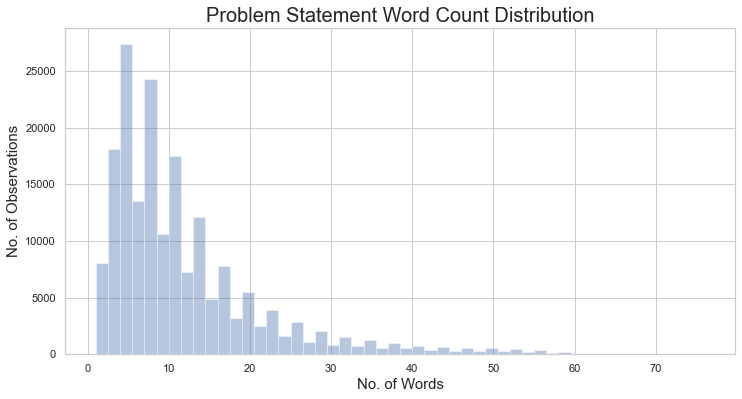

In [24]:
word_count = [len(x.split()) for x in df1['Problem Statement'].tolist()]
barplot_dim = (12, 6)
ax = plt.subplots(figsize =barplot_dim);
ax = sns.distplot(word_count, kde=False);
ax.set_ylabel('No. of Observations', size=15)
ax.set_xlabel('No. of Words', size=15)
ax.set_title('Problem Statement Word Count Distribution', size=20);

In [25]:
def text_cleaning(text):
    '''
    Converts all text to lower case, Removes special charecters, emojis and multiple spaces
    text - Sentence that needs to be cleaned
    '''
    text = ''.join([k for k in text if k not in string.punctuation])
    text = str(text).lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(' +', ' ', text)
    return text

In [26]:
tqdm.pandas()
df1['clean'] = df1['Problem Statement'].progress_apply(text_cleaning)

  0%|          | 0/185687 [00:00<?, ?it/s]

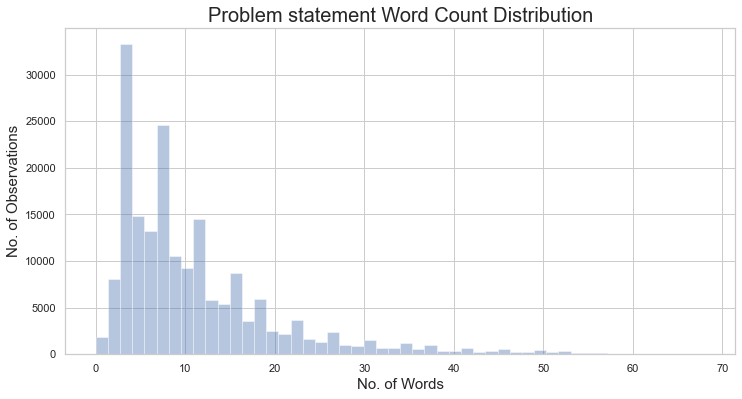

In [27]:
word_count = [len(x.split()) for x in df1['clean'].tolist()]
barplot_dim = (12, 6)
ax = plt.subplots(figsize =barplot_dim);
ax = sns.distplot(word_count, kde=False);
ax.set_ylabel('No. of Observations', size=15)
ax.set_xlabel('No. of Words', size=15)
ax.set_title('Problem statement Word Count Distribution', size=20);

In [28]:
temp_df = pd.DataFrame()
df1['temp_list'] = df1['clean'].apply(lambda x :str(x).split())
top = Counter([item for sublist in df1['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp.columns = ['Common Words', 'Count']
temp.style.background_gradient(cmap='Reds')

In [30]:
df1

Problem Statement  \
0       We transmitted a Michigan return still have no...   
1       Oregon STAT help: Previous Case 203787 Client ...   
2       Corptax Office Import - Credit Account imports...   
3       Searches can't be performed on the new system....   
4          LD400 is not reflecting a temporary adjustment   
...                                                   ...   
189183  In Column B, the total tax due is 12,229.24 (l...   
189184                      Sch. L and M-2 not populating   
189185                           Form 8992 US shareholder   
189186  System will not recognize other subtractions a...   
189187                          Request Login Credentials   

                                                    clean  \
0       we transmitted a michigan return still have no...   
1       oregon stat help previous case client needs he...   
2       corptax office import credit account imports a...   
3       searches cant be performed on the new system i...   
4             ld is not reflecting a temporary adjustment   
...                                                   ...   
189183  in column b the total tax due is line with dis...   
189184                         sch l and m not populating   
189185                                form us shareholder   
189186  system will not recognize other subtractions a...   
189187                          request login credentials   

                                                temp_list  
0       [we, transmitted, a, michigan, return, still, ...  
1       [oregon, stat, help, previous, case, client, n...  
2       [corptax, office, import, credit, account, imp...  
3       [searches, cant, be, performed, on, the, new, ...  
4       [ld, is, not, reflecting, a, temporary, adjust...  
...                                                   ...  
189183  [in, column, b, the, total, tax, due, is, line...  
189184                  [sch, l, and, m, not, populating]  
189185                            [form, us, shareholder]  
189186  [system, will, not, recognize, other, subtract...  
189187                      [request, login, credentials]  

[185687 rows x 3 columns]

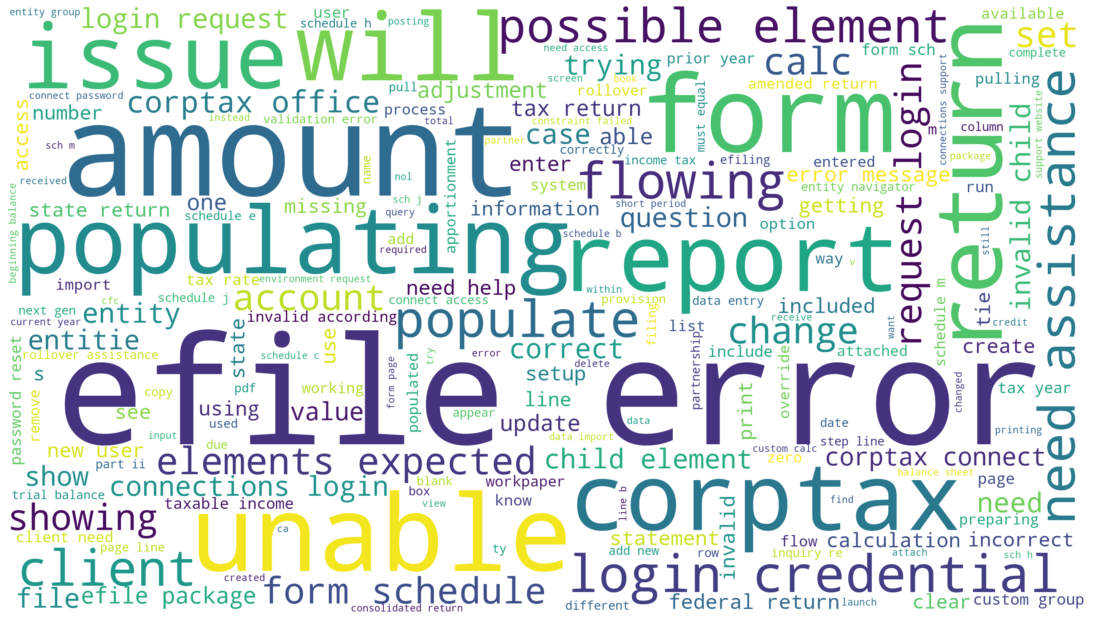

In [29]:
text = ' '.join(df1['clean'])
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, width=2560, height=1440).generate(text)

barplot_dim = (15, 15)
ax = plt.subplots(figsize=barplot_dim, facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [31]:
df1["Case Type"].value_counts()

KeyError: 'Case Type'